# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محاسبه‌ی زاویه‌ی تغییرات یا Gradient Orientation </div>

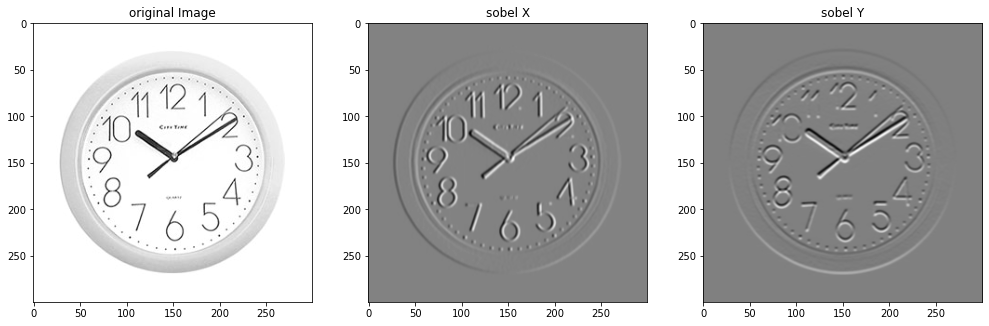

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray_img = cv2.imread('images/clock.jpg', 0)
gray_blur = cv2.blur(gray_img, (3,3))


# 3x3 Sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# apply Sobel edge detection
edges_x = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_x)  
edges_y = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_y)

# Show result
plt.figure(figsize=[17,8])
plt.subplot(131);plt.imshow(gray_img, cmap='gray');plt.title("original Image");
plt.subplot(132);plt.imshow(edges_x, cmap='gray');plt.title("sobel X");
plt.subplot(133);plt.imshow(edges_y, cmap='gray');plt.title("sobel Y");

The function ``phase`` calculates the rotation angle of each 2D vector that is formed from the corresponding elements of x and y : 

$$\texttt{angle} (I) = \texttt{atan2} ( \texttt{y} (I), \texttt{x} (I))$$

[Opencv Doc](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga9db9ca9b4d81c3bde5677b8f64dc0137)

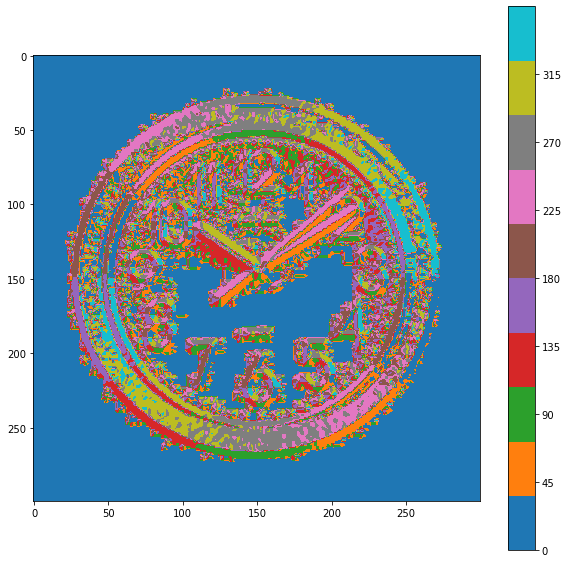

In [2]:
# Compute the orientation of the image
orien = cv2.phase(np.array(edges_x, np.float32), np.array(edges_y, dtype=np.float32), angleInDegrees=True)

plt.figure(figsize=[10,10])
bounds = np.arange(0, 360, 45)
plt.imshow(orien, cmap='tab10'),plt.colorbar(ticks= bounds),plt.show();